In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
df = pd.read_csv('vacinacao.csv')

In [5]:
df

,Ano,Ibge,Mes,Municipio,Não,Sim,Uf,latitude,longitude,region,region_name
0,2018,421915,JAN,VARGEM,NaN,1.0,SC,-27.48,-50.97,42008.0,Meio Oeste
1,2018,316560,JAN,SENADOR CORTES,NaN,1.0,MG,-21.80,-42.94,31047.0,São João Nepomuceno / bicas
2,2018,292370,JAN,PARATINGA,4.0,49.0,BA,-12.69,-43.18,29008.0,Ibotirama
3,2018,210070,JAN,ANAJATUBA,3.0,98.0,MA,-3.26,-44.62,21009.0,Itapecuru Mirim
4,2018,314650,JAN,PAINS,1.0,1.0,MG,-20.37,-45.66,31030.0,Formiga
...,...,...,...,...,...,...,...,...,...,...,...
546977,2014,310630,ABR,BELO ORIENTE,NaN,17.0,MG,-19.22,-42.48,31037.0,Ipatinga
546978,2014,410380,ABR,CAMBIRA,2.0,23.0,PR,-23.58,-51.57,41016.0,16ª RS Apucarana
546979,2014,211060,ABR,SÃO BERNARDO,14.0,68.0,MA,-3.36,-42.41,21006.0,Chapadinha
546980,2014,241220,ABR,SÃO JOSÉ DE MIPIBU,5.0,337.0,RN,-6.07,-35.23,24001.0,1ª Região de Saúde - São José de Mipibu


In [6]:
# Criando a coluna 'ano_mes' para facilitar o agrupamento
df['ano_mes'] = df['Ano'].astype(str) + "_" + df['Mes']

# Agrupando por 'ano_mes' e 'Ibge' e somando as colunas 'Sim' e 'Não'
result = df.groupby(['ano_mes']).agg({'Sim': 'sum', 'Não': 'sum'}).reset_index()

# Calculando o total anual para cada ano
result['Total'] = result['Sim'] + result['Não']
result['Sim_%'] = (result['Sim'] / result['Total']) * 100
result['Não_%'] = (result['Não'] / result['Total']) * 100

# Agrupando por 'ano_mes' e 'Ibge' e somando as colunas 'Sim' e 'Não'
result_ano = df.groupby(['Ano']).agg({'Sim': 'sum', 'Não': 'sum'}).reset_index()

# Calculando o total anual para cada ano
result_ano['Total'] = result_ano['Sim'] + result_ano['Não']
result_ano['Sim_%'] = (result_ano['Sim'] / result_ano['Total']) * 100
result_ano['Não_%'] = (result_ano['Não'] / result_ano['Total']) * 100


In [7]:
result

,ano_mes,Sim,Não,Total,Sim_%,Não_%
0,2013_ABR,370.0,0.0,370.0,100.000000,0.000000
1,2013_AGO,2822.0,227.0,3049.0,92.554936,7.445064
2,2013_DEZ,4619.0,273.0,4892.0,94.419460,5.580540
3,2013_JUL,1777.0,268.0,2045.0,86.894866,13.105134
4,2013_JUN,501.0,123.0,624.0,80.288462,19.711538
...,...,...,...,...,...,...
130,2024_FEV,3978962.0,3195811.0,7174773.0,55.457671,44.542329
131,2024_JAN,3826612.0,3290210.0,7116822.0,53.768550,46.231450
132,2024_JUN,4517593.0,3614387.0,8131980.0,55.553420,44.446580
133,2024_MAI,4495605.0,4400807.0,8896412.0,50.532788,49.467212


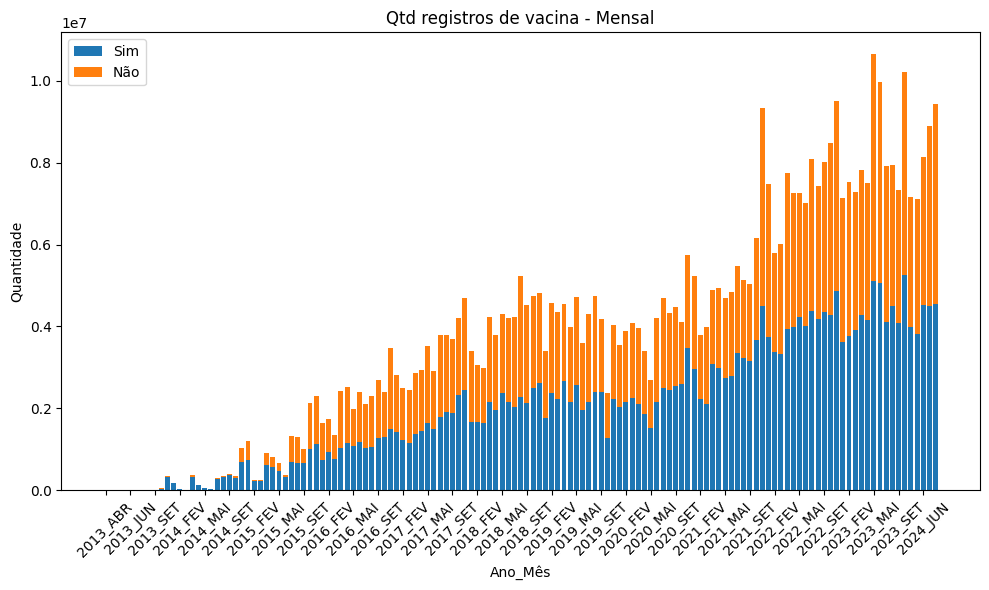

In [11]:
# Configurando o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando os valores de 'Sim' e 'Não' empilhados
ax.bar(result['ano_mes'], result['Sim'], label='Sim')
ax.bar(result['ano_mes'], result['Não'], bottom=result['Sim'], label='Não')

# Customizações do gráfico
ax.set_xlabel('Ano_Mês')
ax.set_ylabel('Quantidade')
ax.set_title('Qtd registros de vacina - Mensal')
ax.set_xticks(result['ano_mes'][::4])
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

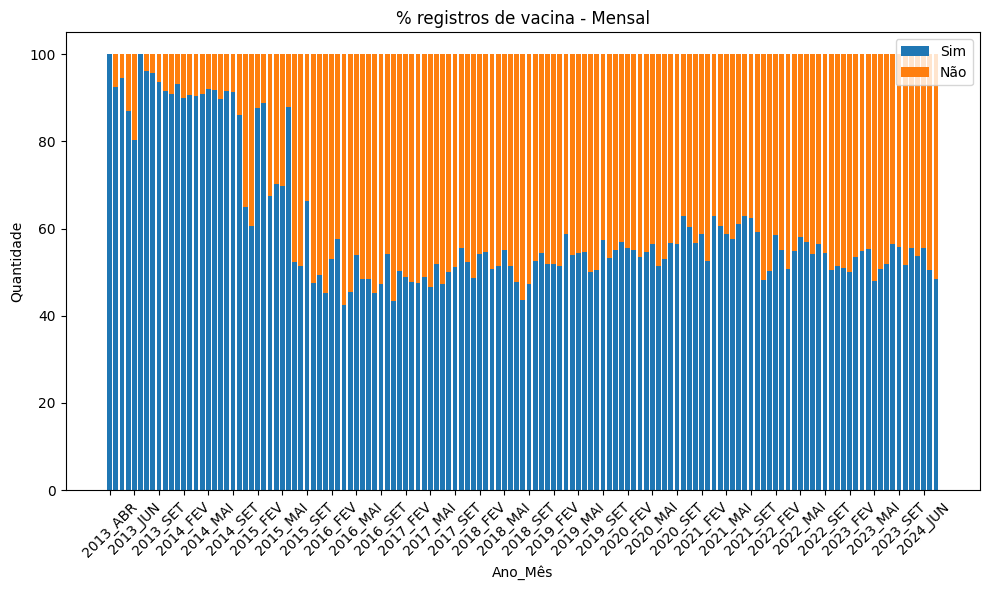

In [13]:
# Configurando o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando os valores de 'Sim' e 'Não' empilhados
ax.bar(result['ano_mes'], result['Sim_%'], label='Sim')
ax.bar(result['ano_mes'], result['Não_%'], bottom=result['Sim_%'], label='Não')

# Customizações do gráfico
ax.set_xlabel('Ano_Mês')
ax.set_ylabel('Quantidade')
ax.set_title('% registros de vacina - Mensal')
ax.set_xticks(result['ano_mes'][::4])
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

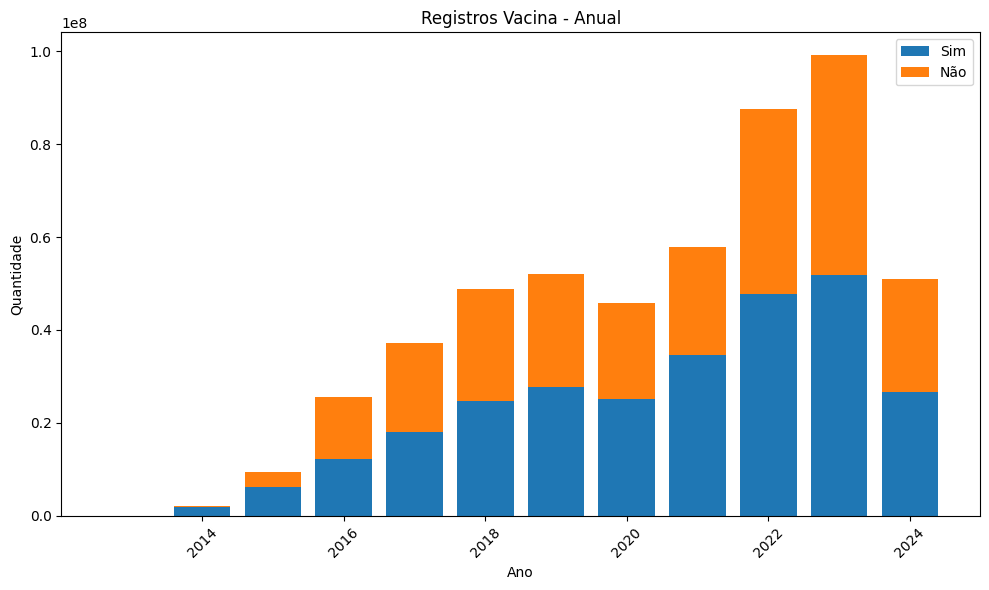

In [15]:
# Configurando o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando os valores de 'Sim' e 'Não' empilhados
ax.bar(result_ano['Ano'], result_ano['Sim'], label='Sim')
ax.bar(result_ano['Ano'], result_ano['Não'], bottom=result_ano['Sim'], label='Não')

# Customizações do gráfico
ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade')
ax.set_title('Registros Vacina - Anual')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

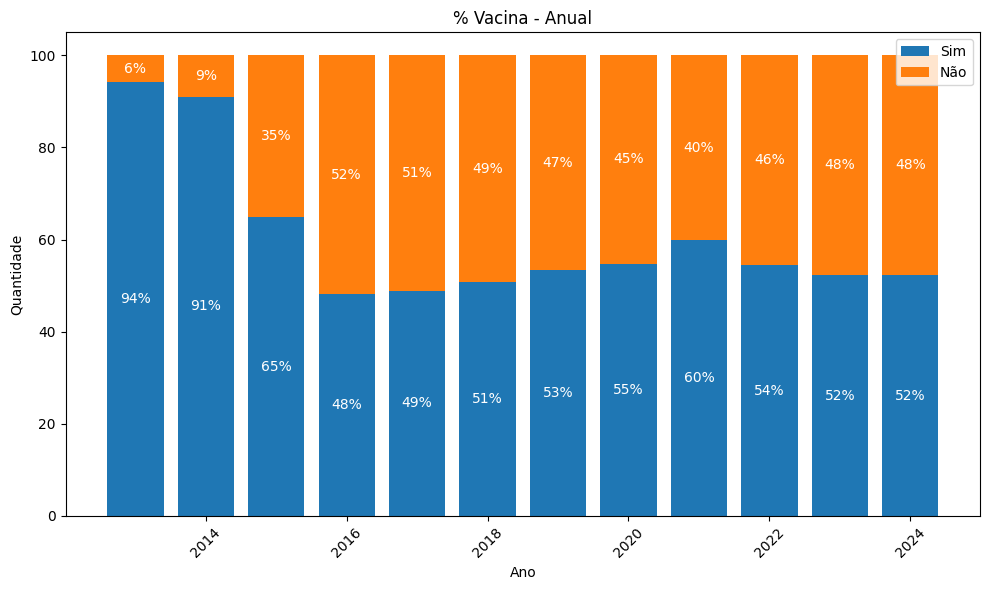

In [20]:
# Configurando o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando os valores de 'Sim' e 'Não' empilhados
ax.bar(result_ano['Ano'], result_ano['Sim_%'], label='Sim')
ax.bar(result_ano['Ano'], result_ano['Não_%'], bottom=result_ano['Sim_%'], label='Não')

# Adicionando as porcentagens dentro das barras
for i in range(len(result_ano)):
    ax.text(result_ano['Ano'][i], result_ano['Sim_%'][i] / 2, f"{result_ano['Sim_%'][i]:.0f}%", 
            ha='center', va='center', color='white', fontsize=10)
    ax.text(result_ano['Ano'][i], result_ano['Sim_%'][i] + result_ano['Não_%'][i] / 2, f"{result_ano['Não_%'][i]:.0f}%", 
            ha='center', va='center', color='white', fontsize=10)

# Customizações do gráfico
ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade')
ax.set_title('% Vacina - Anual')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

APLICANDO O FILTRO DOS DADOS PARA O MUNICÍPIO DE SÃO PAULO

In [23]:
#Filtra dados para o município de São Paulo 355030
df_sp = df[df['Ibge']==355030]

# Agrupando por 'ano_mes' e 'Ibge' e somando as colunas 'Sim' e 'Não'
result_sp = df_sp.groupby(['ano_mes']).agg({'Sim': 'sum', 'Não': 'sum'}).reset_index()

# Calculando o total anual para cada ano
result_sp['Total'] = result_sp['Sim'] + result_sp['Não']
result_sp['Sim_%'] = (result_sp['Sim'] / result_sp['Total']) * 100
result_sp['Não_%'] = (result_sp['Não'] / result_sp['Total']) * 100

# Agrupando por 'ano_mes' e 'Ibge' e somando as colunas 'Sim' e 'Não'
result_sp_ano = df_sp.groupby(['Ano']).agg({'Sim': 'sum', 'Não': 'sum'}).reset_index()

# Calculando o total anual para cada ano
result_sp_ano['Total'] = result_sp_ano['Sim'] + result_sp_ano['Não']
result_sp_ano['Sim_%'] = (result_sp_ano['Sim'] / result_sp_ano['Total']) * 100
result_sp_ano['Não_%'] = (result_sp_ano['Não'] / result_sp_ano['Total']) * 100

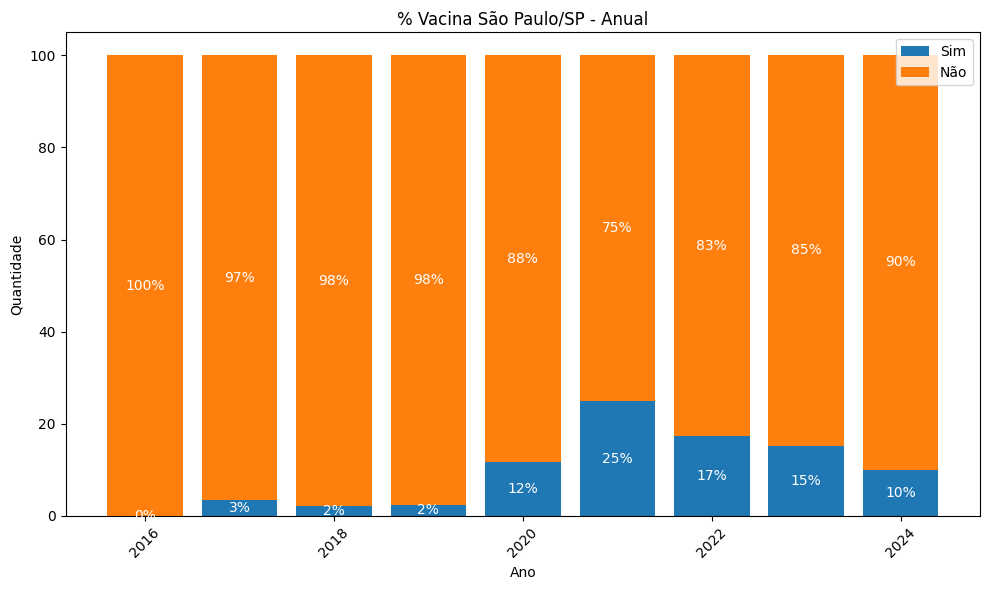

In [25]:
# Configurando o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando os valores de 'Sim' e 'Não' empilhados
ax.bar(result_sp_ano['Ano'], result_sp_ano['Sim_%'], label='Sim')
ax.bar(result_sp_ano['Ano'], result_sp_ano['Não_%'], bottom=result_sp_ano['Sim_%'], label='Não')

# Adicionando as porcentagens dentro das barras
for i in range(len(result_sp_ano)):
    ax.text(result_sp_ano['Ano'][i], result_sp_ano['Sim_%'][i] / 2, f"{result_sp_ano['Sim_%'][i]:.0f}%", 
            ha='center', va='center', color='white', fontsize=10)
    ax.text(result_sp_ano['Ano'][i], result_sp_ano['Sim_%'][i] + result_sp_ano['Não_%'][i] / 2, f"{result_sp_ano['Não_%'][i]:.0f}%", 
            ha='center', va='center', color='white', fontsize=10)

# Customizações do gráfico
ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade')
ax.set_title('% Vacina São Paulo/SP - Anual')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()